<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/WISDM/WISDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical


In [2]:
df = pd.read_csv('/content/drive/MyDrive/WISDM.csv', header=None)
df.columns = ['idx', 'user_id', 'activity', 'timestep', 'x_axis', 'y_axis', 'z_axis']
display(df.head())

,idx,user_id,activity,timestep,x_axis,y_axis,z_axis
0,0,33,Jogging,4.910600e+13,-0.694638,12.680544,0.503953
1,1,33,Jogging,4.910610e+13,5.012288,11.264028,0.953424
2,2,33,Jogging,4.910610e+13,4.903325,10.882658,-0.081722
3,3,33,Jogging,4.910620e+13,-0.612916,18.496431,3.023717
4,4,33,Jogging,4.910630e+13,-1.184970,12.108489,7.205164


In [3]:
df['activity'].unique()

array(['Jogging', 'Walking', 'Upstairs', 'Downstairs', 'Sitting',
       'Standing'], dtype=object)

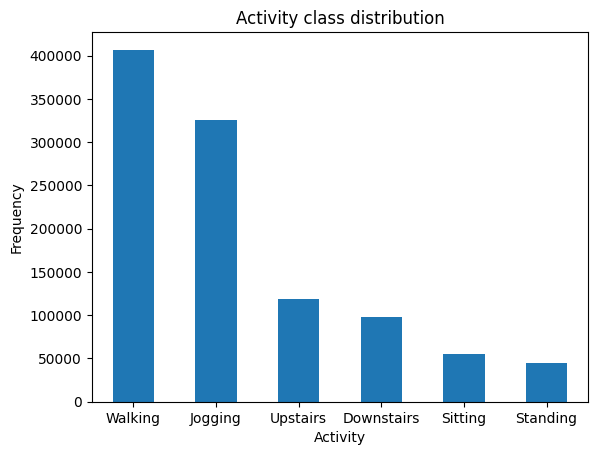

In [4]:
count_classes = df['activity'].value_counts(sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Activity class distribution")
plt.xlabel("Activity")
plt.ylabel("Frequency");

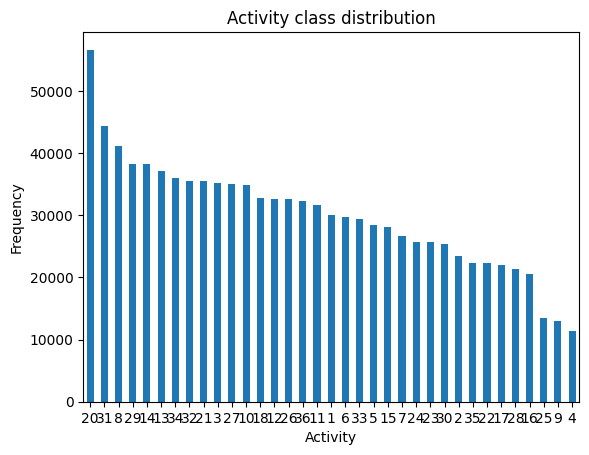

In [5]:
count_classes = df['user_id'].value_counts(sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Activity class distribution")
plt.xlabel("Activity")
plt.ylabel("Frequency");

In [6]:
df.shape

(1048575, 7)

In [7]:
#각 activity별로 데이터 shape 분류
Walking = df[df['activity'] == 'Walking']
Jogging = df[df['activity'] == 'Jogging']
Upstairs = df[df['activity'] == 'Upstairs']
Downstairs = df[df['activity'] == 'Downstairs']
Sitting = df[df['activity'] == 'Sitting']
Standing = df[df['activity'] == 'Standing']
print(f"Jogging data shape: {Jogging.shape}")
print(f"Walking data shape: {Walking.shape}")
print(f"Upstairs data shape: {Upstairs.shape}")
print(f"Downstairs data shape: {Downstairs.shape}")
print(f"Sitting data shape: {Sitting.shape}")
print(f"Standing data shape: {Standing.shape}")

Jogging data shape: (325975, 7)
Walking data shape: (406775, 7)
Upstairs data shape: (118589, 7)
Downstairs data shape: (97813, 7)
Sitting data shape: (54876, 7)
Standing data shape: (44547, 7)


In [8]:
data = df.drop(['idx','user_id', 'timestep'], axis=1)
data.shape

(1048575, 4)

In [9]:
X_train, X_test = train_test_split(data, test_size=0.3, random_state=42)
y_train = X_train['activity']
X_train = X_train.drop(['activity'], axis=1)

X_test, X_val = train_test_split(data, test_size=0.5, random_state=42)
y_test = X_test['activity']                 #y_test는 각 데이터의 activity를 보유
X_test = X_test.drop(['activity'], axis=1)  #x ,y, z정보를 보유

y_val = X_val['activity']
X_val = X_val.drop(['activity'], axis=1)

X_train = X_train.values
X_test = X_test.values
X_val = X_val.values



le = LabelEncoder()
y_train_int = le.fit_transform(y_train)
y_test_int = le.transform(y_test)
y_val_int = le.transform(y_val)

y_train_oh = to_categorical(y_train_int)
y_test_oh = to_categorical(y_test_int)
y_val_oh = to_categorical(y_val_int)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
X_val = scaler.fit_transform(X_val)

모델 생성

In [11]:
model = Sequential([
    Input(shape=(3, )),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(6, activation='softmax')
])

In [12]:
#모델 컴파일하기
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 248,966 (972.52 KB)

 Trainable params: 248,966 (972.52 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model_gru = model.fit(X_train, y_train_oh, epochs=10 , batch_size=128, validation_data=(X_test, y_test_oh))

Epoch 1/10
5735/5735 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.5866 - loss: 1.0681 - val_accuracy: 0.6206 - val_loss: 0.9858
Epoch 2/10
5735/5735 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.6194 - loss: 0.9847 - val_accuracy: 0.6211 - val_loss: 0.9745
Epoch 3/10
5735/5735 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.6217 - loss: 0.9757 - val_accuracy: 0.6249 - val_loss: 0.9657
Epoch 4/10
5735/5735 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.6246 - loss: 0.9693 - val_accuracy: 0.6208 - val_loss: 0.9633
Epoch 5/10
5735/5735 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.6257 - loss: 0.9657 - val_accuracy: 0.6284 - val_loss: 0.9581
Epoch 6/10
5735/5735 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.6267 - loss: 0.9622 - val_accuracy: 0.6294 - val_loss: 0.9540
Epoch 7/10
5735/5735 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.6259 - loss: 0.9630 - val_accuracy: 0.6227 - val_loss: 0.9588
Epoch 8/10
5735/5735 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.6274 - loss: 0

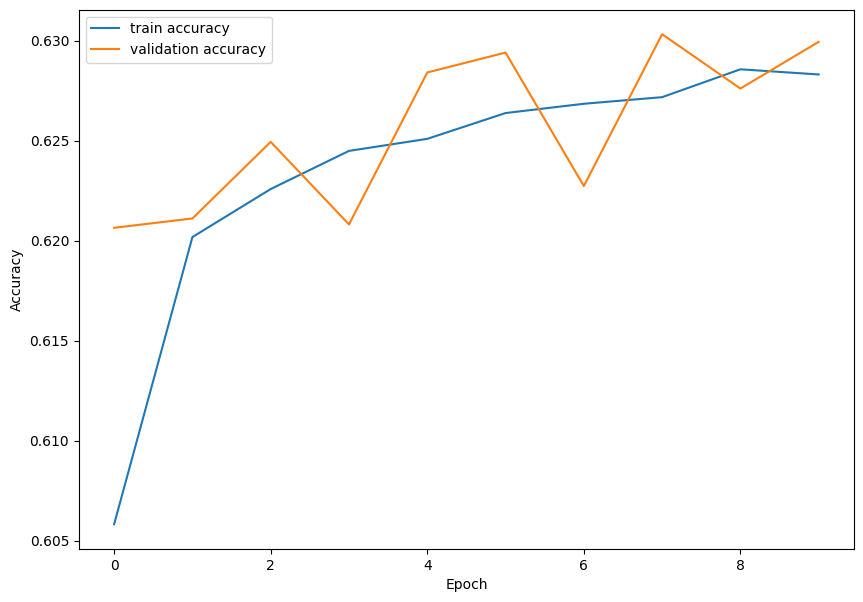

In [15]:
# accuracy 체크
import matplotlib.pyplot as plt

N_EPOCHS = 10 # 에포크 수 정의
history = model_gru # 학습 히스토리 변수 사용

plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['accuracy'], label='train accuracy')
plt.plot(range(N_EPOCHS), history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

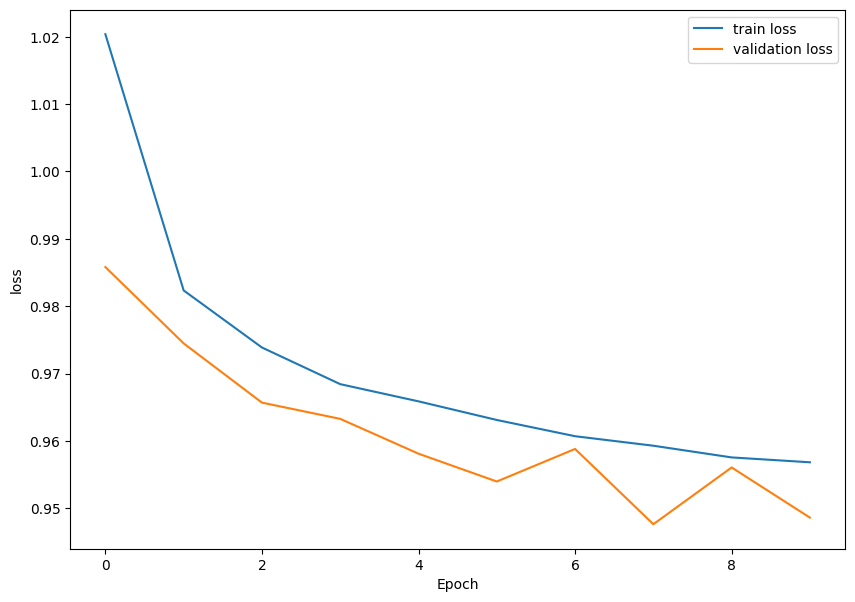

In [16]:
# loss 체크
import matplotlib.pyplot as plt

N_EPOCHS = 10 # 에포크 수 정의
history = model_gru # 학습 히스토리 변수 사용

plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()
plt.show()